In [22]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [23]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [24]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [25]:
# View all of the classes that automap foun
Base.classes.keys()

['measurement', 'station']

In [26]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [27]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [28]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
temp_june = session.query(Measurement).filter(extract('month', Measurement.date) == 6).all()


In [29]:
#  3. Convert the June temperatures to a list.
list_temp_june = [temp.tobs for temp in temp_june]

In [30]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
list_temp_june_df = pd.DataFrame(list_temp_june, columns=["Temperature"])

In [31]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
list_temp_june_df.describe()

,Temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [32]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
temp_dec = session.query(Measurement).filter(extract('month', Measurement.date) == 12).all()

In [33]:
# 7. Convert the December temperatures to a list.
list_temp_dec = [temp.tobs for temp in temp_dec]

In [34]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
list_temp_dec_df = pd.DataFrame(list_temp_dec, columns=["Temperature"])

<AxesSubplot:>

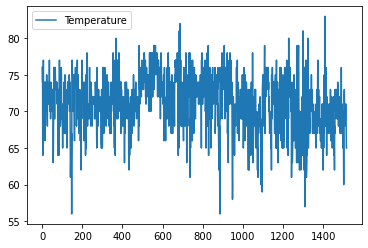

In [36]:
list_temp_dec_df.plot()

In [35]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
list_temp_dec_df.describe()

,Temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000
